<a href="https://colab.research.google.com/github/DSWoodin/Practice/blob/main/PKNU_5th/01_DA/02_PandasBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 강의 분량
* 07월08일(월) 3시간 30분

### 강의 자료
* 판다스데이터분석_01판다스입문

### 이 장에서 배우는 것
* 딕셔너리 -> 시리즈 변환
* 리스트 -> 시리즈 변환
* Series.index
* Series.values
* 시리즈 인덱스 이름 지정 Series(index=)
* 시리즈 원소 추출 Series['인덱스명'], Series[0], 슬라이싱
* 딕셔너리 -> 데이터프레임 변환 df.index, df.columns
* 데이터프레임 행 인덱스/열 이름 지정 및 변경 df.rename()
* 행 삭제 df.drop(axis=0)
* 열 삭제 df.drop(axis=1)
* 행 선택 df.loc['인덱스명'], df.iloc[0], 슬라이싱
* 열 선택 df['열이름']
* 행 추가 df.loc[새로운 행인덱스]=
* 열 추가 df['새로운 열이름']=
* 데이터프레임 원소 추출 및 변경 df.loc[ , ], df.loc[][], df.iloc, df.iloc=
* 데이터프레임 전치 transpose(), T
* 기존 열을 행인덱스로 지정 set_index()
* 행인덱스 지정 reindex(), 파라미터 fill_value
* 행인덱스 초기화 reset_index()
* 행인덱스 기준 정렬 sort_index(), 파라미터 ascending
* 열 기준 정렬 sort_values(), 파라미터 by, ascending
* 시리즈와 숫자 연산
* 시리즈와 시리즈 연산, NaN이 있는 경우
* 시리즈 연산 메소드, 파라미터 fill_value
* Seaborn의 titanic 데이터셋 사용
* df.head(), df.tail()
* 데이터프레임과 숫자 연산
* 데이터프레임과 데이터프레임 연산


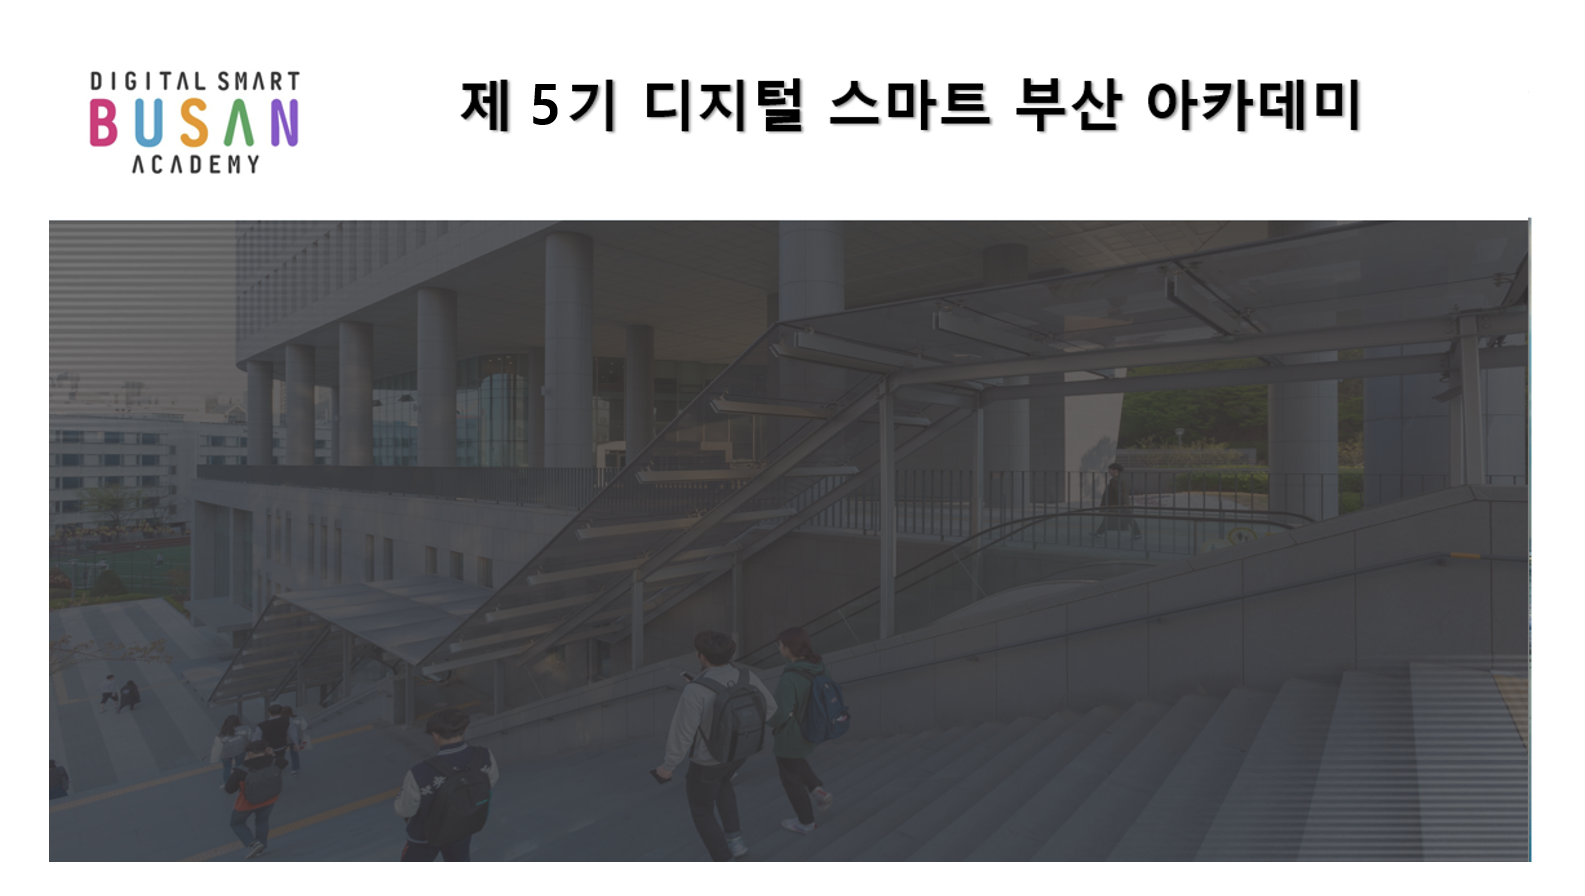

# **01 판다스 입문**

# 1. 판다스 라이브러리
* 데이터를 수집하고 정리하는 데 최적화된 도구
* 오픈소스
* 데이터과학의 80~90% 업무를 처리할 수 있음
* https://pandas.pydata.org/

# 2. 판다스 자료 구조
* 시리즈(Series)와 데이터프레임(DataFrame)이라는 구조화된 데이터 형식을 제공

## 2-1 시리즈(Series)
* [그림] 시리즈 구조

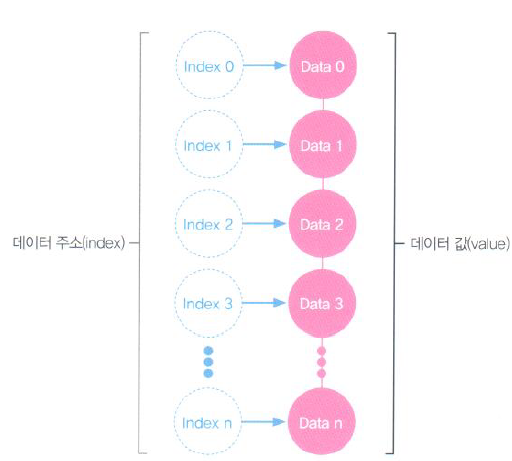

### 1. 시리즈 만들기

* 시리즈 : 데이터가 순차적으로 나열된 1차원 형태의 배열

* 인덱스와 값이 1대1로 대응이되며 키와 값이 1대1 대응하는 딕셔너리와 비슷한 구조를 가짐

* 딕셔너리를 시리즈로 변환하게 되면 키(k)가 인덱스로, 값(v)은 그대로 값으로 들어간다

* [그림] 딕셔너리 ▷ 시리즈 변환

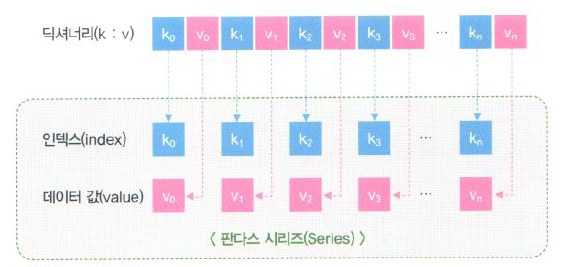



In [ ]:
# <예제 1-1> 딕셔너리 ▷ 시리즈 변환
# -*- coding: utf-8 -*-

# pandas 불러오기
import pandas as pd

# k:v 구조를 갖는 딕셔너리를 만들고, 변수 dict_data에 저장
dict_data = {'a': 1, 'b': 2, 'c': 3}

# 판다스 Series() 함수로 딕셔너리(dict_data)를 시리즈로 변환. 변수 sr에 저장
sr = pd.Series(dict_data)

# 변수 sr의 자료형 출력
print(type(sr))
print('\n')

# 변수 sr에 저장되어 있는 시리즈 객체를 출력
print(sr)

<class 'pandas.core.series.Series'>


a    1
b    2
c    3
dtype: int64


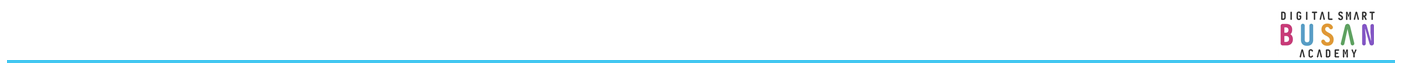

### 2. 인덱스 구조

* 인덱스는 자기와 짝을 이루는 데이터 값의 순서와 주소를 저장

* 인덱스는 정수형 위치 인덱스와 인덱스 이름(인덱스 라벨)로 분류

* 시리즈의 인덱스와 값은

```
인덱스 배열: Series객체.index
```

```
데이터 값 배열: Series객체.values
```

* [그림] 시리즈 인덱스의 유형

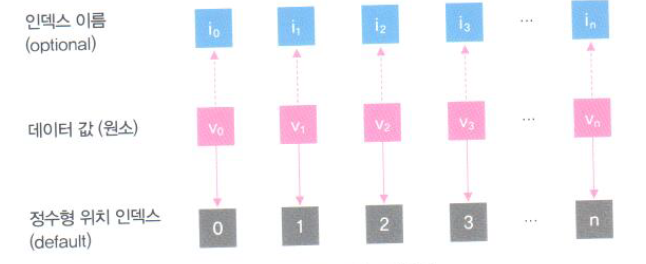


In [ ]:
# <예제 1-2> 시리즈 인덱스
# -*- coding: utf-8 -*-
import pandas as pd

# 리스트를 시리즈로 변환하여 변수 sr에 저장
list_data = ['2019-01-02', 3.14, 'ABC', 100, True]
sr = pd.Series(list_data)
print(sr)
print('\n')

# 인덱스 배열은 변수 idx에 저장. 데이터 값 배열은 변수 val에 저장
idx = sr.index
val = sr.values
print(idx)
print('\n')
print(val)

0    2019-01-02
1          3.14
2           ABC
3           100
4          True
dtype: object


RangeIndex(start=0, stop=5, step=1)


['2019-01-02' 3.14 'ABC' 100 True]


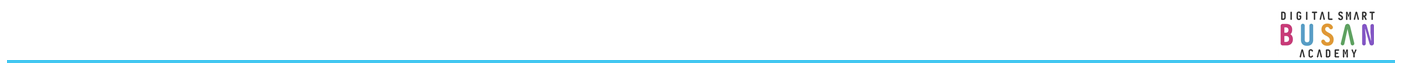

### 3. 원소 선택

* 인덱스(원소의 위치를 나타내는 주소 역할)를 이용하여 시리즈 원소를 선택
* 인덱스의 두 가지 유형
  * 정수형 위치 인덱스는 대괄호([])안에 위치를 나타내는 숫자를 입력
  * 인덱스 이름(라벨)을 사용할 때는 대괄호([]) 안에 이름과 함께 따옴표를 입력(""와 '' 모두 사용 가능)

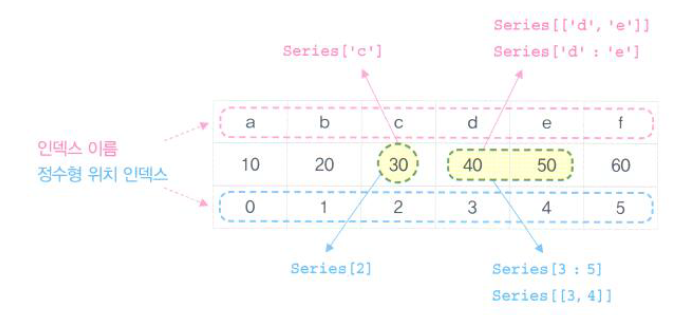



In [ ]:
# <예제 1-3> 시리즈 원소 선택
# -*- coding: utf-8 -*-
import pandas as pd

# 투플을 시리즈로 변환(index 옵션에 인덱스 이름을 지정)
tup_data = ('영인', '2010-05-01', '여', True)
sr = pd.Series(tup_data, index=['이름', '생년월일', '성별', '학생여부'])
print(sr)
print('\n')

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object




In [ ]:
# 원소를 1개 선택
print(sr[0])       # sr의 1 번째 원소를 선택 (정수형 위치 인덱스를 활용)
print(sr['이름'])  # '이름' 라벨을 가진 원소를 선택 (인덱스 이름을 활용)
print('\n')

영인
영인




<ipython-input-5-dc7a85424f5c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sr[0])       # sr의 1 번째 원소를 선택 (정수형 위치 인덱스를 활용)


In [ ]:
# 여러 개의 원소를 선택 (인덱스 리스트 활용)
print(sr[[1, 2]])
print('\n')
print(sr[['생년월일', '성별']])
print('\n')

생년월일    2010-05-01
성별               여
dtype: object


생년월일    2010-05-01
성별               여
dtype: object




<ipython-input-6-5c286c7f366c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(sr[[1, 2]])


In [ ]:
sr[0:3]

이름              영인
생년월일    2010-05-01
성별               여
dtype: object

In [ ]:
# 여러 개의 원소를 선택 (인덱스 범위 지정)
print(sr[1 : 2])
print('\n')
print(sr['생년월일' : '성별'])

생년월일    2010-05-01
dtype: object


생년월일    2010-05-01
성별               여
dtype: object


* 숫자를 활용한 슬라이싱의 경우 [끝자리를 포함하지 않는다]

* 문자를 활용한 슬라이싱의 경우 [끝자리를 포함한다]

* sr[0:2]의 경우 2의 위치는 포함하지 않으므로 인덱스 0과 1의 값이 불러와지는 한편 sr['다음' : '뭐로']의 경우 '뭐로'도 포함되어 모든 값이 불러와짐을 알 수 있다

* 딕셔너리를 시리즈로 변환할 때와 달리 리스트나 튜플의 경우는 자동으로 정수형 위치 인덱스가 지정된다.
  * 인덱스가 필요한 경우 시리즈로 변환할 때 index=['']를 사용함으로써 명칭을 지정해줄 수 있다.

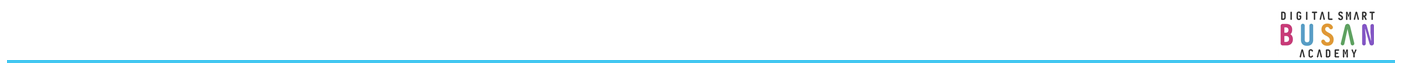

## 2-2 데이터프레임

* 1차원 배열인 시리즈와 달리 데이터 프레임은 2차원 배열
  * Excel이나 RDBMS가 2차원 배열 구조를 사용

* 데이터프레임은 여러 개의 시리즈들이 모여서 만들어 진다
  * 시리즈를 열 벡터(Vector)라고 하면, 데이터프레임은 여러 개의 열 벡터들이 같은 행 인덱스를 기준으로 줄지어 결합된 2차원 벡터 혹은 행렬(Matrix)이다.

* [그림] 데이터프레임의 구조

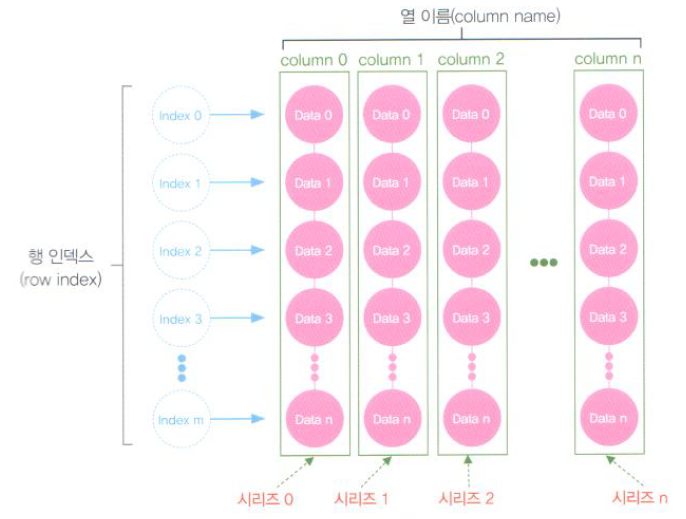


* 데이터프레임은 행과 열을 나타내기 위해 두 가지 주소를 사용
  1. 행 인덱스 (row index)
  2. 열 이름 (column name/label)

  * 데이터프레임의 열: 공통의 속성을 갖는 일련의 데이터
  * 데이터프레임의 행: 개별 관측대상에 대한 다양한 속성(열)의 모임인 레코드

* [표] 주식 종목 리스트
  * 각 행은 하나의 주식 종목에 관한 관측값(observation)
  * 열은 종목 코드, 회사이름, 액면가, 총 주식수 등 공통의 속성이나 범주를 나타냄, 보통 변수(variable)로 활용

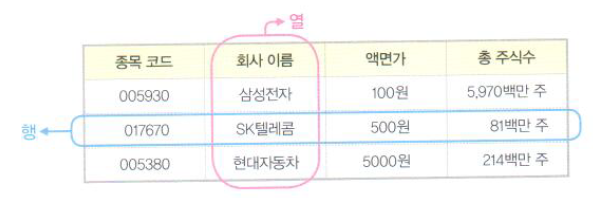

### 1. 데이터프레임 만들기

* 데이터프레임은 같은 길이의 1차원 배열(시리즈)이 여러 개 필요
  * 1차원 배열은 시리즈(열, column)이므로, 여러 개의 시리즈의 집합이 곧 데이터프레임
  * 딕셔너리의 값(v)에 해당하는 각 리스트가 시리즈 배열로 변환되어 데이터프레임의 열
  * 딕셔너리의 키(k)는 각 시리즈의 이름으로 변환되어 데이터프레임의 열 이름

* [그림] 딕셔너리 ▷ 데이터프레임 변환

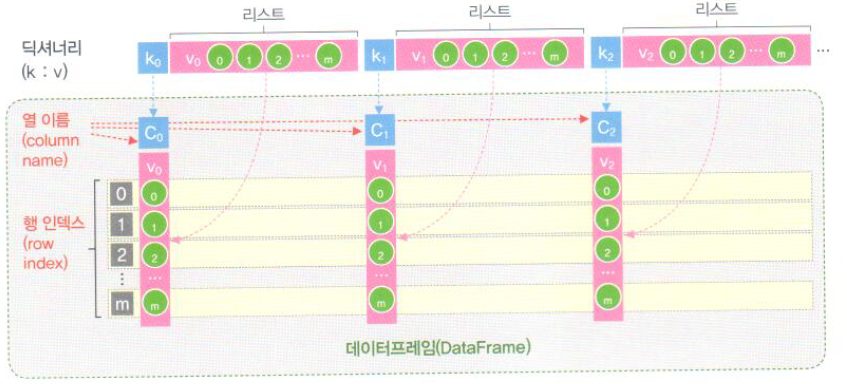


```
딕셔너리 ▷ 데이터프레임 변환: pandas.DataFrame(딕셔너리 객체)
```




In [ ]:
# <예제 1-4> 딕셔너리 ▷ 데이터프레임 변환
# -*- coding: utf-8 -*-

import pandas as pd

# 열이름을 key로 하고, 리스트를 value로 갖는 딕셔너리 정의(2차원 배열)
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 판다스 DataFrame() 함수로 딕셔너리를 데이터프레임으로 변환. 변수 df에 저장.
df = pd.DataFrame(dict_data)

# df의 자료형 출력
print(type(df))
print('\n')
# 변수 df에 저장되어 있는 데이터프레임 객체를 출력
print(df)

<class 'pandas.core.frame.DataFrame'>


   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


* 데이터프레임으로 만드는 함수는 pd.DataFrame()을 활용
  * 딕셔너리의 경우 키가 열 이름으로 지정되고 이후 값이 하향식으로 나열
  * 행 인덱스의 경우 따로 지정된 바가 없으므로 자동으로 숫자가 지정

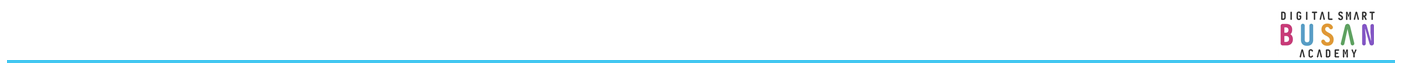

### 2. 행 인덱스/ 열 이름 설정


```
행 인덱스/ 열 이름 설정: pandas.DataFrame(2차원 배열,
                   index=행 인덱스 배열,
                   columns=열 이름 배열)
```

In [ ]:
# <예제 1-5> 행 인덱스/ 열 이름 설정
# -*- coding: utf-8 -*-

import pandas as pd

# 행 인덱스/열 이름 지정하여, 데이터프레임 만들기
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']],
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])

# 행 인덱스, 열 이름 확인하기
print(df)            #데이터프레임
print('\n')
print(df.index)      #행 인덱스
print('\n')
print(df.columns)    #열 이름

    나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중


Index(['준서', '예은'], dtype='object')


Index(['나이', '성별', '학교'], dtype='object')


* 실행결과 리스트가 행으로 변환되는 점에 유의
  * 딕셔너리는 키 값이 열 이름으로 가고 값들이 열 형태로 반환

* [그림] 행 인덱스/열 이름 속성

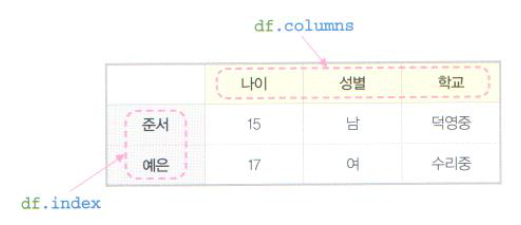




```
* 행 인덱스 변경: DataFrame 객체.index= 새로운 행 인덱스 배열
* 열 이름 변경: DataFrame 객체.columns= 새로운 열 이름 배열
```



In [ ]:
# 행 인덱스, 열 이름 변경하기
df.index=['학생1', '학생2']
df.columns=['연령', '남녀', '소속']

print(df)            #데이터프레임
print('\n')
print(df.index)      #행 인덱스
print('\n')
print(df.columns)    #열 이름

     연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중


Index(['학생1', '학생2'], dtype='object')


Index(['연령', '남녀', '소속'], dtype='object')


In [ ]:
df.index=['row0', 'row1']
df.columns=['col0', 'col1', 'col2']
df

col0 col1 col2
row0    15    남  덕영중
row1    17    여  수리중

* rename 메소드

```
* 행 인덱스 변경: DataFrame 객체.rename(index={ 기존 인덱스:새로운 인덱스, ...})
* 열 이름 변경: DataFrame 객체.rename(columns={ 기존 이름:새 이름, ...})
```



In [ ]:
# <예제 1-6> 행 인덱스/ 열 이름 변경
# -*- coding: utf-8 -*-

import pandas as pd

# 행 인덱스/열 이름 지정하여, 데이터프레임 만들기
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']],
                   index=['준서', '예은'],
                   columns=['나이', '성별', '학교'])

# 데이터프레임 df 출력
print(df)
print("\n")

# 열 이름 중, '나이'를 '연령'으로, '성별'을 '남녀'로, '학교'를 '소속'으로 바꾸기
df.rename(columns={'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True)

# df의 행 인덱스 중에서, '준서'를 '학생1'로, '예은'을 '학생2'로 바꾸기
df.rename(index={'준서':'학생1', '예은':'학생2' }, inplace=True)

# df 출력(변경 후)
print(df)

    나이 성별   학교
준서  15  남  덕영중
예은  17  여  수리중


     연령 남녀   소속
학생1  15  남  덕영중
학생2  17  여  수리중


In [ ]:
import pandas as pd

list_a = [[80, 10],
          [70, 20],
          [50, 100]]

df = pd.DataFrame(list_a,
                  index=['런천미트','리챔','스팸'],
                  columns=['가격','맛']
                  )

df.rename(index={'리챔':'스팸마일드'}, inplace=True)
df.rename(columns={'가격':'Price', '맛':'Taste'}, inplace=True)

print(df)

       Price  Taste
런천미트      80     10
스팸마일드     70     20
스팸        50    100


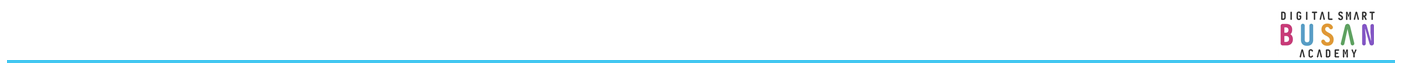

### 3. 행/열 삭제

* drop 메소드

```
* 행 삭제: DataFrame 객체.drop(행 인덱스 또는 배열, axis=0 )
* 열 삭제: DataFrame 객체.drop(열 이름 또는 배열, axis=1 )
```

* drop 메소드를 활용하면 데이터프레임의 행이나 열을 지울 수 있다
  * 데이터프레임 객체명.drop( 지울 행이나 열의 명칭, axis)
  * 행을 지우고 싶다면 행의 명칭, axis=0
  * 열을 지우고 싶다면 열의 명칭, axis=1
  * axis=0이 기본 값(default)이기 때문에 행을 지우고 싶을 경우엔 axis를 입력하지 않아도 된다

* [그림] 행 삭제

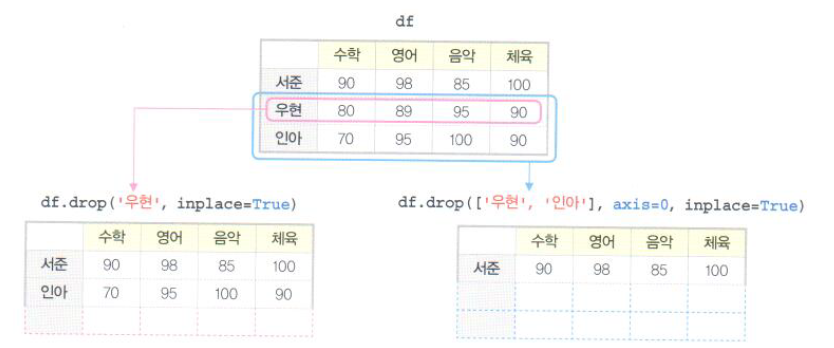



In [ ]:
# <예제 1-7> 행 삭제
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
print(df)
print('\n')

# 데이터프레임 df를 복제하여 변수 df2에 저장. df2의 1개 행(row)을 삭제
df2 = df[:]
df2.drop('우현', inplace=True)
print(df2)
print('\n')

# 데이터프레임 df를 복제하여 변수 df3에 저장. df3의 2개 행(row)을 삭제
df3 = df[:]
df3.drop(['우현', '인아'], axis=0, inplace=True)
print(df3)

    수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


    수학  영어   음악   체육
서준  90  98   85  100
인아  70  95  100   90


    수학  영어  음악   체육
서준  90  98  85  100


<ipython-input-16-8818c76412e1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('우현', inplace=True)
<ipython-input-16-8818c76412e1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['우현', '인아'], axis=0, inplace=True)


* [그림] 열 삭제

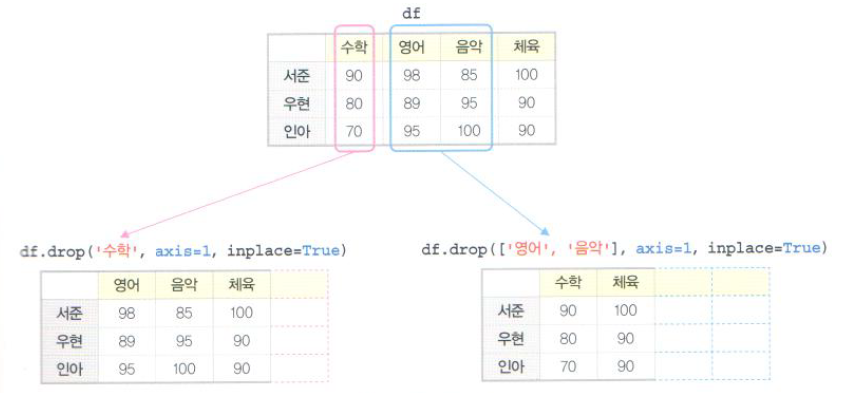



In [ ]:
# <예제 1-8> 열 삭제
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
print(df)
print('\n')

# 데이터프레임 df를 복제하여 변수 df4에 저장. df4의 1개 열(column)을 삭제
df4 = df.copy()
df4.drop('수학', axis=1, inplace=True)
print(df4)
print('\n')

# 데이터프레임 df를 복제하여 변수 df5에 저장. df5의 2개 열(column)을 삭제
df5 = df.copy()
df5.drop(['영어', '음악'], axis=1, inplace=True)
print(df5)


    수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


    영어   음악   체육
서준  98   85  100
우현  89   95   90
인아  95  100   90


    수학   체육
서준  90  100
우현  80   90
인아  70   90


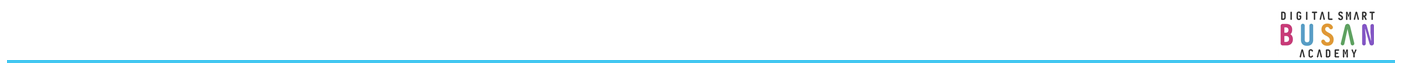

### 4. 행 선택

* 행 데이터를 선택하기 위해서는 loc와 iloc 인덱서를 사용
  * 인덱스 이름을 기준으로 인덱싱을 할때 loc
  * 정수형 위치 인덱스를 기준으로 인덱싱을 할때 iloc

|구분|loc|iloc|
|------|---|---|
|탐색대상|인덱스 이름(index label)|정수형 위치 인덱스(integer position)|
|범위지정|가능(범위의 끝 포함)|가능(범위의 끝 제외)|
|예|['a':'c']--> 'a','b','c'|[3:7]--> 3, 4, 5, 6 (* 7제외)|

In [ ]:
# <예제 1-9> 행 선택
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'수학' : [ 90, 80, 70], '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100], '체육' : [ 100, 90, 90]}

df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
print(df)       # 데이터프레임 출력
print('\n')

# 행 인덱스를 사용하여 행 1개를 선택
label1 = df.loc['서준']    # loc 인덱서 활용
position1 = df.iloc[0]     # iloc 인덱서 활용
print(label1)
print('\n')
print(position1)
print('\n')

    수학  영어   음악   체육
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64


수학     90
영어     98
음악     85
체육    100
Name: 서준, dtype: int64




In [ ]:
# 행 인덱스를 사용하여 2개 이상의 행 선택
label2 = df.loc[['서준', '우현']]
position2 = df.iloc[[0, 1]]
print(label2)
print('\n')
print(position2)
print('\n')

    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90


    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90




In [ ]:
# 행 인덱스의 범위를 지정하여 행 선택
label3 = df.loc['서준':'우현']
position3 = df.iloc[0:1]
print(label3)
print('\n')
print(position3)

    수학  영어  음악   체육
서준  90  98  85  100
우현  80  89  95   90


    수학  영어  음악   체육
서준  90  98  85  100


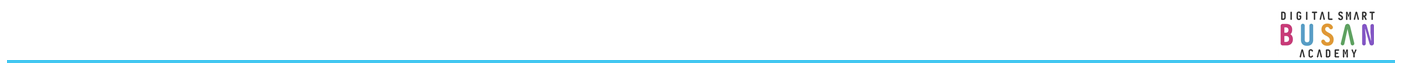

### 5. 열 선택

* 열 데이터도 두 가지 방법으로 선택이 가능
  * 데이터프레임 객체명.열 이름 ==> 반드시 열 이름이 문자열일 경우만 가능
  * 데이터프레임 객체명['열 이름']

```
* 열 1개 선택(시리즈 생성): DataFrame 객체["열 이름"] 또는 DataFrame 객체.열 이름
```  

* [그림] 데이터프레임의 열 선택

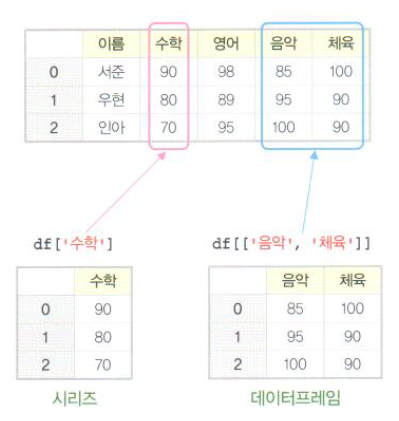


```
* 열 n개 선택(데이터프레임 생성): DataFrame 객체[[열1, 열2, ..., 열n]]
```



In [ ]:
# <예제 1-10> 열 선택
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)
print(type(df))
print('\n')

# '수학' 점수 데이터만 선택. 변수 math1에 저장
math1 = df['수학']
print(math1)
print(type(math1))
print('\n')

# '영어' 점수 데이터만 선택. 변수 english에 저장
english = df.영어
print(english)
print(type(english))
print('\n')

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90
<class 'pandas.core.frame.DataFrame'>


0    90
1    80
2    70
Name: 수학, dtype: int64
<class 'pandas.core.series.Series'>


0    98
1    89
2    95
Name: 영어, dtype: int64
<class 'pandas.core.series.Series'>




In [ ]:
# '음악', '체육' 점수 데이터를 선택. 변수 music_gym 에 저장
music_gym = df[['음악', '체육']]
print(music_gym)
print(type(music_gym))
print('\n')

# '수학' 점수 데이터만 선택. 변수 math2에 저장
math2 = df[['수학']]
print(math2)
print(type(math2))

    음악   체육
0   85  100
1   95   90
2  100   90
<class 'pandas.core.frame.DataFrame'>


   수학
0  90
1  80
2  70
<class 'pandas.core.frame.DataFrame'>


* 범위 슬라이싱의 고급 활용

```
범위 슬라이싱: DataFrame 객체.iloc[ 시작 인덱스: 끝 인덱스: 슬라이싱 간격]
```


In [ ]:
# 0행부터 2행 간격으로 선택
df.iloc[: : 2]

이름  수학  영어   음악   체육
0  서준  90  98   85  100
2  인아  70  95  100   90

In [ ]:
# 0행부터 2행까지 2행 간격으로 선택
df.iloc[0:3:2]

이름  수학  영어   음악   체육
0  서준  90  98   85  100
2  인아  70  95  100   90

In [ ]:
# 역순으로 정렬
df.iloc[ : :-1]

이름  수학  영어   음악   체육
2  인아  70  95  100   90
1  우현  80  89   95   90
0  서준  90  98   85  100

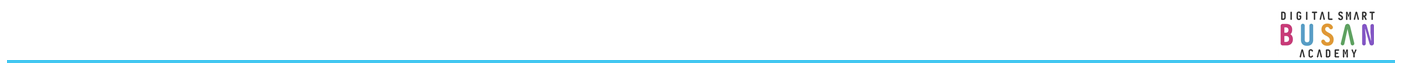

### 6. 원소 선택

* 행 이름 선택 + 열 이름 선택을 합치면 특정 행, 특정 열의 값을 선택할 수 있다
  * 일종의 2차원 좌표를 입력

  
```
* 인덱스 이름: DataFrame 객체.loc[ 행 인덱스: 열 이름]
* 정수 위치 인덱스: DataFrame 객체.iloc[ 행 번호: 열 번호]
```

* [그림] 데이터프레임의 [행, 열] 데이터 선택

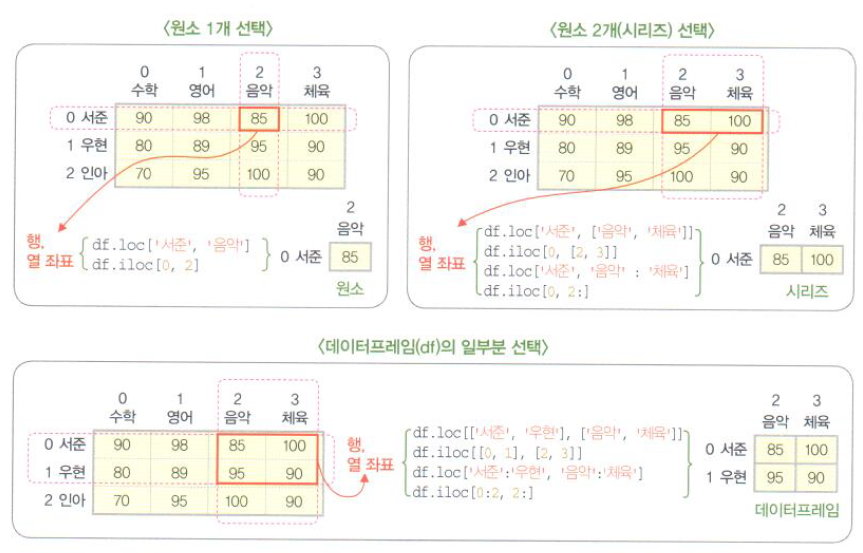



In [ ]:
# <예제 1-11> 원소 선택
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)

# '이름' 열을 새로운 인덱스로 지정하고, df 객체에 변경사항 반영
df.set_index('이름', inplace=True)
print(df)

    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


In [ ]:
# 데이터프레임 df의 특정 원소 1개 선택 ('서준'의 '음악' 점수)
a = df.loc['서준', '음악']
print(a)
b = df.iloc[0, 2]
print(b)

85
85


In [ ]:
# 데이터프레임 df의 특정 원소 2개 이상 선택 ('서준'의 '음악', '체육' 점수)
c = df.loc['서준', ['음악', '체육']]
print(c)
d = df.iloc[0, [2, 3]]
print(d)
e = df.loc['서준', '음악':'체육']
print(e)
f = df.iloc[0, 2:]
print(f)

음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64
음악     85
체육    100
Name: 서준, dtype: int64


In [ ]:
# df의 2개 이상의 행과 열로부터 원소 선택 ('서준', '우현'의 '음악', '체육' 점수)
g = df.loc[['서준', '우현'], ['음악', '체육']]
print(g)
h = df.iloc[[0, 1], [2, 3]]
print(h)
i = df.loc['서준':'우현', '음악':'체육']
print(i)
j = df.iloc[0:2, 2:]
print(j)

    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90
    음악   체육
이름         
서준  85  100
우현  95   90


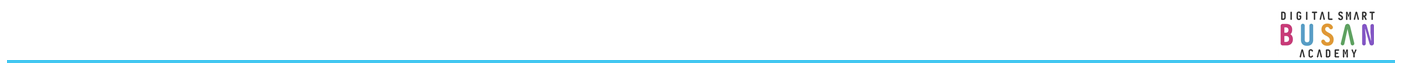

### 7. 열 추가

* 열을 조회하는 함수에 = 를 달고 값을 지정해주면 된다
  * 데이터프레임 객체명['열 이름'] = 새로운 열 값
  
```
열 추가: DataFrame 객체['추가하려는 열 이름']=데이터 값
```

* [그림] 데이터프레임의 열 추가

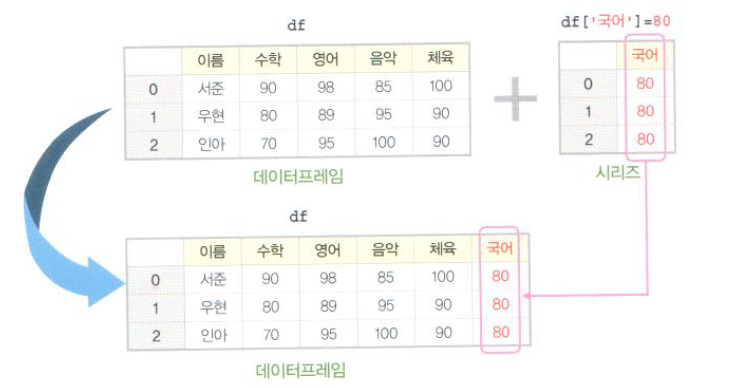



In [ ]:
# <예제 1-12> 열 추가
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)
print('\n')

# 데이터프레임 df에 '국어' 점수 열(column)을 추가. 데이터 값은 80 지정
df['국어'] = 80
print(df)


   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


   이름  수학  영어   음악   체육  국어
0  서준  90  98   85  100  80
1  우현  80  89   95   90  80
2  인아  70  95  100   90  80


In [ ]:
import pandas as pd

list_a = [[80, 10],
          [70, 20],
          [50, 100]]

df = pd.DataFrame(list_a,
                  index=['런천미트','리챔','스팸'],
                  columns=['가격','맛']
                  )

df['인기'] = [1,40,100]

print(df)

      가격    맛   인기
런천미트  80   10    1
리챔    70   20   40
스팸    50  100  100


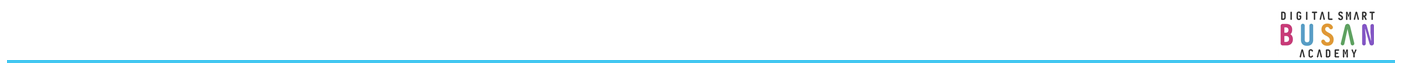

### 8. 행 추가

* 행을 조회하는 함수에 = 을 걸고 새로운 값을 지정
  * 열 추가와 동일
  * 행 벡터 자체도 배열이기 때문에 새로운 값에 행을 지정해줄 수도 있다
  * 새로운 인덱스를 추가하려면 기존의 인덱스와 이름이 겹쳐선 안된다


```
행 추가: DataFrame.loc['새로운 행 이름']=데이터 값 (또는 배열)
```

[그림] 데이터프레임의 행 추가

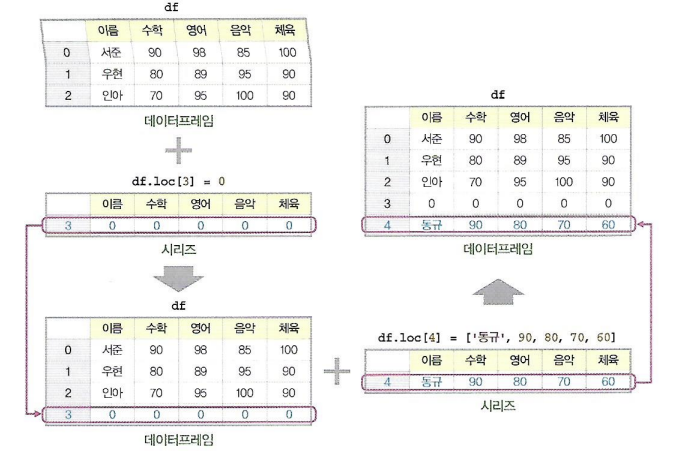



In [ ]:
# <예제 1-13> 행 추가
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : ['서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)
print('\n')

# 새로운 행(row)을 추가 - 같은 원소 값을 입력
df.loc[3] = 0
print(df)
print('\n')

# 새로운 행(row)을 추가 - 원소 값 여러 개의 배열 입력
df.loc[4] = ['동규', 90, 80, 70, 60]
print(df)
print('\n')

# 새로운 행(row)을 추가 - 기존 행을 복사
df.loc['행5'] = df.loc[3]
print(df)

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90
3   0   0   0    0    0


   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90
3   0   0   0    0    0
4  동규  90  80   70   60


    이름  수학  영어   음악   체육
0   서준  90  98   85  100
1   우현  80  89   95   90
2   인아  70  95  100   90
3    0   0   0    0    0
4   동규  90  80   70   60
행5   0   0   0    0    0


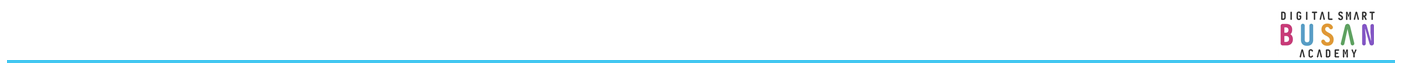

### 9. 원소 값 변경

```
원소 값 변경: DataFrame.객체의 일부분 또는 원소를 선택=데이터 값
```

In [ ]:
# <예제 1-14> 원소 값 변경
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)

# '이름' 열을 새로운 인덱스로 지정하고, df 객체에 변경사항 반영
df.set_index('이름', inplace=True)
print(df)
print('\n')

# 데이터프레임 df의 특정 원소를 변경하는 방법: '서준'의 '체육' 점수
df.iloc[0][3] = 80
print(df)
print('\n')

df.loc['서준']['체육'] = 90
print(df)
print('\n')

df.loc['서준', '체육'] = 100
print(df)

    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


    수학  영어   음악  체육
이름                 
서준  90  98   85  80
우현  80  89   95  90
인아  70  95  100  90


    수학  영어   음악  체육
이름                 
서준  90  98   85  90
우현  80  89   95  90
인아  70  95  100  90


    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


<ipython-input-33-47f76bf3bf9c>:20: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df.iloc[0][3] = 80


In [ ]:
# 데이터프레임 df의 원소 여러 개를 변경하는 방법: '서준'의 '음악', '체육' 점수
df.loc['서준', ['음악', '체육']] = 50
print(df)
print('\n')

df.loc['서준', ['음악', '체육']] = 100, 50
print(df)

    수학  영어   음악  체육
이름                 
서준  90  98   50  50
우현  80  89   95  90
인아  70  95  100  90


    수학  영어   음악  체육
이름                 
서준  90  98  100  50
우현  80  89   95  90
인아  70  95  100  90


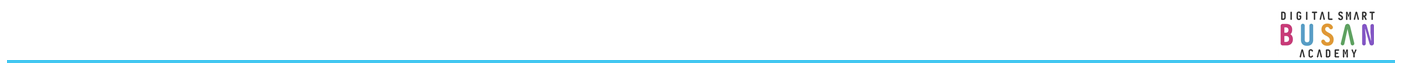

### 10. 행과 열의 위치 바꾸기

* 선형대수학의 전치행렬과 같은 개념
* 두 가지 방법으로 사용 가능
  * 데이터프레임 객체명.transpose()
  * 데이터프레임 객체명.T

```
행,열 바꾸기: DataFrame 객체.transpose() 또는 DataFrame 객체.T
```


* [그림] 행, 열 바꾸기

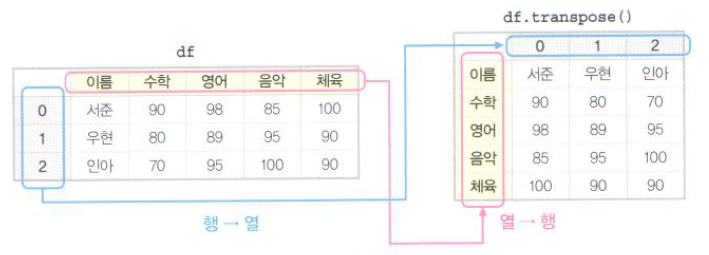



In [ ]:
# <예제 1-15> 행, 열 바꾸기
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)
print('\n')

# 데이터프레임 df를 전치하기 (메소드 활용)
df = df.transpose()
print(df)
print('\n')

# 데이터프레임 df를 다시 전치하기 (클래스 속성 활용)
df = df.T
print(df)

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


      0   1    2
이름   서준  우현   인아
수학   90  80   70
영어   98  89   95
음악   85  95  100
체육  100  90   90


   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


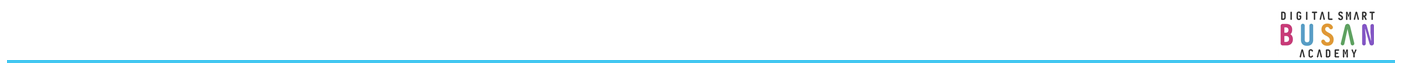


## 3. 인덱스의 활용

### 1. 특정 열을 행 인덱스로 설정

* set_index() 메소드
  * 데이터프레임 내부의 특정 열을 행 인덱스로 설정
  * 원본 데이터프레임을 바꾸지 않고 새로운 데이터프레임 객체를 반환하는 점에 유의

* set_index() 메소드를 사용하여 행 인덱스를 새로 지정하면 기존 행 인덱스는 삭제된다.

```
특정 열을 행 인덱스로 설정: DataFrame 객체.set_index(['열 이름'] 또는 '열 이름')
```

* [그림] 데이터프레임의 특정 열을 행 인덱스로 설정

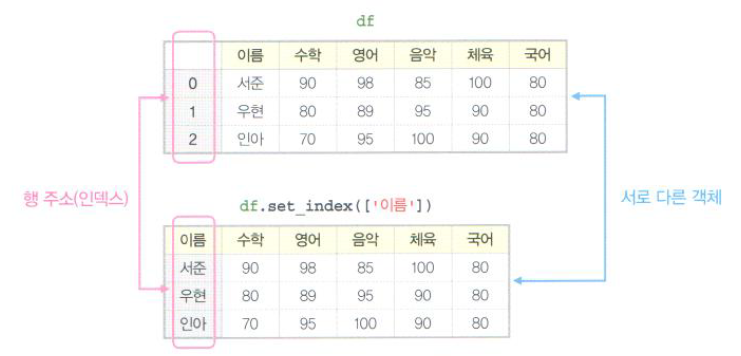




In [ ]:
# <예제 1-16> 특정 열을 행 인덱스로 설정
# -*- coding: utf-8 -*-

import pandas as pd

# DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
exam_data = {'이름' : [ '서준', '우현', '인아'],
             '수학' : [ 90, 80, 70],
             '영어' : [ 98, 89, 95],
             '음악' : [ 85, 95, 100],
             '체육' : [ 100, 90, 90]}
df = pd.DataFrame(exam_data)
print(df)
print('\n')

# 특정 열(column)을 데이터프레임의 행 인덱스(index)로 설정
ndf = df.set_index(['이름'])
print(ndf)
print('\n')
ndf2 = ndf.set_index('음악')
print(ndf2)
print('\n')
ndf3 = ndf.set_index(['수학', '음악'])
print(ndf3)

   이름  수학  영어   음악   체육
0  서준  90  98   85  100
1  우현  80  89   95   90
2  인아  70  95  100   90


    수학  영어   음악   체육
이름                  
서준  90  98   85  100
우현  80  89   95   90
인아  70  95  100   90


     수학  영어   체육
음악              
85   90  98  100
95   80  89   90
100  70  95   90


        영어   체육
수학 음악          
90 85   98  100
80 95   89   90
70 100  95   90


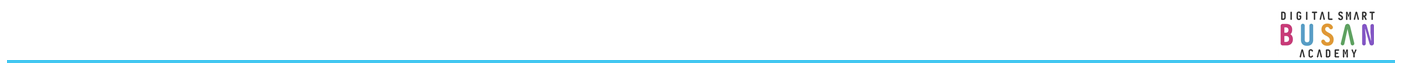

### 2. 행 인덱스 재배열
* reindex() 메소드를 사용하면 데이터프레임의 행 인덱스를 새로운 배열로 재지정

```
새로운 배열로 행 인덱스를 재지정: DataFrame 객체.reindex(새로운 인덱스 배열)
```



In [ ]:
# <예제 1-17> 새로운 배열로 행 인덱스로 재지정
# -*- coding: utf-8 -*-

import pandas as pd

# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
print(df)
print('\n')

# 인덱스를 [r0, r1, r2, r3, r4]로 재지정
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf = df.reindex(new_index)
print(ndf)
print('\n')

# reindex로 발생한 NaN값을 숫자 0으로 채우기
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']
ndf2 = df.reindex(new_index, fill_value=0)
print(ndf2)


    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


     c0   c1   c2    c3    c4
r0  1.0  4.0  7.0  10.0  13.0
r1  2.0  5.0  8.0  11.0  14.0
r2  3.0  6.0  9.0  12.0  15.0
r3  NaN  NaN  NaN   NaN   NaN
r4  NaN  NaN  NaN   NaN   NaN


    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15
r3   0   0   0   0   0
r4   0   0   0   0   0


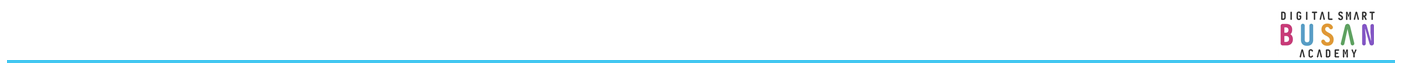

### 3. 행 인덱스초기화
* reset_index() 메소드를 활용하여 행 인덱스를 정수형 위치 인덱스로 초기화한다.
  * 기존 행 인덱스는 열로 이동

```
정수형 위치 인덱스로 초기화: DataFrame 객체.reset_index()
```

In [ ]:
# <예제 1-18>  정수형 위치 인덱스로 초기화
# -*- coding: utf-8 -*-

import pandas as pd

# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
print(df)
print('\n')

# 행 인덱스를 정수형으로 초기화
ndf = df.reset_index()
print(ndf)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


  index  c0  c1  c2  c3  c4
0    r0   1   4   7  10  13
1    r1   2   5   8  11  14
2    r2   3   6   9  12  15


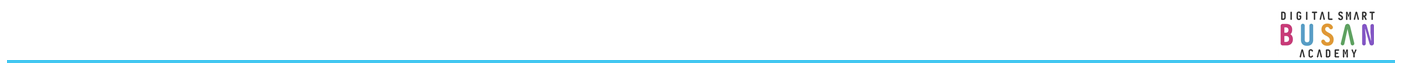

### 4. 행 인덱스를 기준으로 데이터프레임 정렬
* sort_index() 메소드를 활용하여 행 인덱스를 기준으로 데이터프레임의 값을 정렬
  * ascending = True : 오름차순
  * ascending = Fasle: 내림차순

```
행 인덱스를 기준 정렬: DataFrame 객체.sort_index()
```



In [ ]:
# <예제 1-19>  데이터프레임 정렬
# -*- coding: utf-8 -*-

import pandas as pd

# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
print(df)
print('\n')

# 내림차순으로 행 인덱스 정렬
ndf = df.sort_index(ascending=False)
print(ndf)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


    c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13


* 특정 열의 데이터 값을 기준으로 데이터프레임 정렬하기

```
열 기준 정렬: DataFrame 객체.sort_values()
```



In [ ]:
# <예제 1-20>  열 기준 정렬
# -*- coding: utf-8 -*-

import pandas as pd

# 딕셔서리를 정의
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10,11,12], 'c4':[13,14,15]}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
print(df)
print('\n')

# c1 열을 기준으로 내림차순 정렬
ndf = df.sort_values(by='c1', ascending=False)
print(ndf)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


    c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13


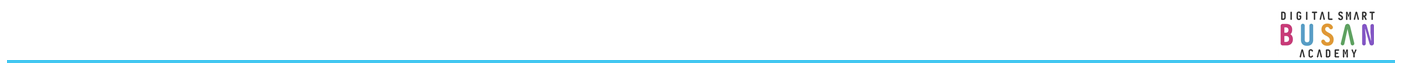

# 4.산술연산

## 4-1 시리즈 연산
### 1. 시리즈 vs 숫자

```
시리즈와 숫자 연산: Series객체+연산자(+, -, *, /)+ 숫자
```



In [ ]:
# <예제 1-21>  시리즈를 숫자로 나누기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
print(student1)
print('\n')

# 학생의 과목별 점수를 200으로 나누기
percentage = student1 / 200

print(percentage)
print('\n')
print(type(percentage))

국어    100
영어     80
수학     90
dtype: int64


국어    0.50
영어    0.40
수학    0.45
dtype: float64


<class 'pandas.core.series.Series'>


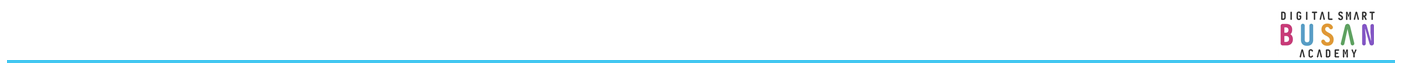

### 2. 시리즈 vs 시리즈

```
시리즈와 시리즈 연산: Series1+연산자(+, -, *, /)+ Series2
```



In [ ]:
# <예제 1-22>  시리즈 사칙연산
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90, '영어':80})

print(student1)
print('\n')
print(student2)
print('\n')

# 두 학생의 과목별 점수로 사칙연산 수행
addition = student1 + student2               #덧셈
subtraction = student1 - student2            #뺄셈
multiplication = student1 * student2         #곱셈
division = student1 / student2               #나눗셈
print(type(division))
print('\n')

# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
result = pd.DataFrame([addition, subtraction, multiplication, division],
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
print(result)

국어    100
영어     80
수학     90
dtype: int64


수학    80
국어    90
영어    80
dtype: int64


<class 'pandas.core.series.Series'>


              국어        수학      영어
덧셈    190.000000   170.000   160.0
뺄셈     10.000000    10.000     0.0
곱셈   9000.000000  7200.000  6400.0
나눗셈     1.111111     1.125     1.0


* [그림] 시리즈의 산술연산(덧셈)

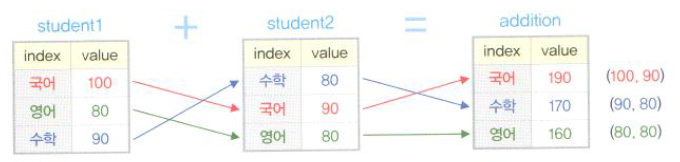

* [그림] NaN 값이 있는 시리즈의 산술연산(덧셈)

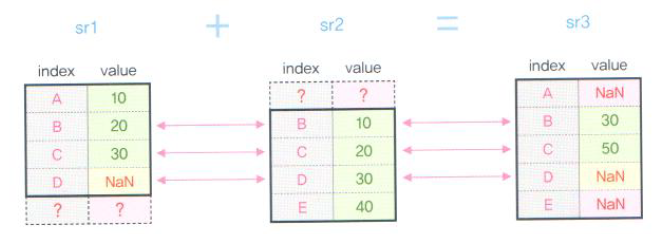



In [ ]:
# <예제 1-22>  NaN 값이 있는 시리즈 연산
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

print(student1)
print('\n')
print(student2)
print('\n')

# 두 학생의 과목별 점수로 사칙연산 수행 (시리즈 vs. 시리즈)
addition = student1 + student2               #덧셈
subtraction = student1 - student2            #뺄셈
multiplication = student1 * student2         #곱셈
division = student1 / student2               #나눗셈
print(type(division))
print('\n')

# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
result = pd.DataFrame([addition, subtraction, multiplication, division],
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
print(result)

국어     NaN
영어    80.0
수학    90.0
dtype: float64


수학    80
국어    90
dtype: int64


<class 'pandas.core.series.Series'>


     국어        수학  영어
덧셈  NaN   170.000 NaN
뺄셈  NaN    10.000 NaN
곱셈  NaN  7200.000 NaN
나눗셈 NaN     1.125 NaN


* 연산에서 객체 사이에 공통 인덱스가 없거나 NaN이 포함된 경우 연산 결과는 NaN으로 반환

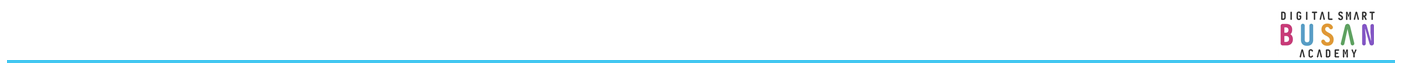

### 3. 연산 메소드
* fill_value 옵션에 값을 지정해주면 NaN 값에 지정한 값이 산출될 것

```
연산 메소드 사용(시리즈와 시리즈 덧셈): Series1.add(Series2, fill_value=0)
```



In [ ]:
# <예제 1-24>  연산 메소드 사용 -시리즈 연산
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 딕셔너리 데이터로 판다스 시리즈 만들기
student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

print(student1)
print('\n')
print(student2)
print('\n')

# 두 학생의 과목별 점수로 사칙연산 수행 (연산 메소드 사용)
sr_add = student1.add(student2, fill_value=0)    #덧셈
sr_sub = student1.sub(student2, fill_value=0)    #뺄셈
sr_mul = student1.mul(student2, fill_value=0)    #곱셈
sr_div = student1.div(student2, fill_value=0)    #나눗셈

# 사칙연산 결과를 데이터프레임으로 합치기 (시리즈 -> 데이터프레임)
result = pd.DataFrame([sr_add, sr_sub, sr_mul, sr_div],
                      index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
print(result)

국어     NaN
영어    80.0
수학    90.0
dtype: float64


수학    80
국어    90
dtype: int64


       국어        수학    영어
덧셈   90.0   170.000  80.0
뺄셈  -90.0    10.000  80.0
곱셈    0.0  7200.000   0.0
나눗셈   0.0     1.125   inf


* NaN 대신 0으로 입력

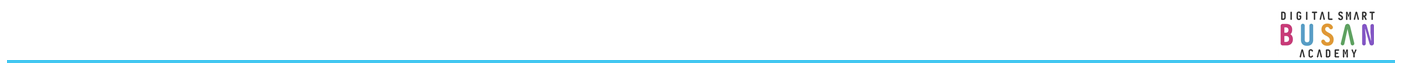

## 4-2 데이터프레임 연산
### 1. 데이터프레임 vs 숫자

```
데이터프레임과 숫자 연산: DataFrame 객체+연산자(+, -, *, /)+ 숫자
```



In [ ]:
# <예제 1-25>  데이터프레임에 숫자 더하기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.head())   #첫 5행만 표시
print('\n')
print(type(df))
print('\n')

# 데이터프레임에 숫자 10 더하기
addition = df + 10
print(addition.head())   #첫 5행만 표시
print('\n')
print(type(addition))

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


<class 'pandas.core.frame.DataFrame'>


    age     fare
0  32.0  17.2500
1  48.0  81.2833
2  36.0  17.9250
3  45.0  63.1000
4  45.0  18.0500


<class 'pandas.core.frame.DataFrame'>


* 실행 결과 데이터프레임에 숫자 10을 더한 결과는 동일한 형태의 데이터프레임으로 정리
  * 모든 원소에 숫자 10을 더하고 데이터프레임의 크기나 모양은 변하지 않는다.

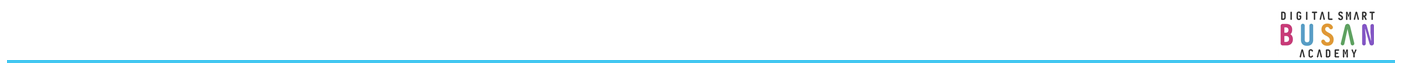



### 2. 데이터프레임 vs 데이터프레임

```
데이터프레임의 연산자 활용: DataFrame1+연산자(+, -, *, /)+ DataFrame2
```



* [그림] 데이터프레임의 산술연산(덧셈)

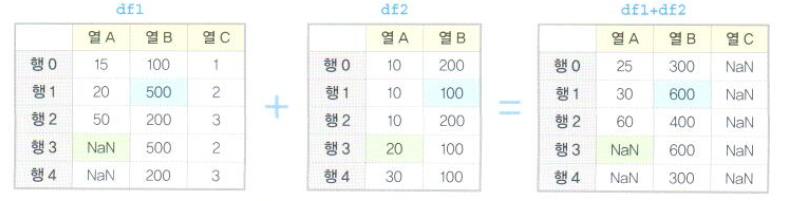


In [ ]:
# <예제 1-26>  데이터프레임끼리 더하기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
print(df.tail())          #마지막 5행을 표시
print('\n')
print(type(df))
print('\n')

# 데이터프레임에 숫자 10 더하기
addition = df + 10
print(addition.tail())    #마지막 5행을 표시
print('\n')
print(type(addition))
print('\n')

# 데이터프레임끼리 연산하기 (additon - df)
subtraction = addition - df
print(subtraction.tail())   #마지막 5행을 표시
print('\n')
print(type(subtraction))

      age   fare
886  27.0  13.00
887  19.0  30.00
888   NaN  23.45
889  26.0  30.00
890  32.0   7.75


<class 'pandas.core.frame.DataFrame'>


      age   fare
886  37.0  23.00
887  29.0  40.00
888   NaN  33.45
889  36.0  40.00
890  42.0  17.75


<class 'pandas.core.frame.DataFrame'>


      age  fare
886  10.0  10.0
887  10.0  10.0
888   NaN  10.0
889  10.0  10.0
890  10.0  10.0


<class 'pandas.core.frame.DataFrame'>


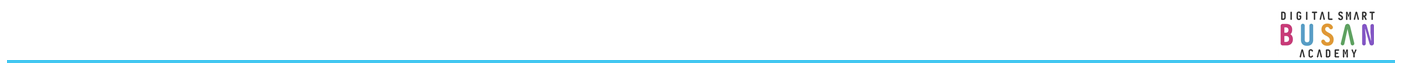